# LOADING IMAGE

In [1]:
import mmcv
import src.features.build_features as pp
from src.visualization.visualize import *

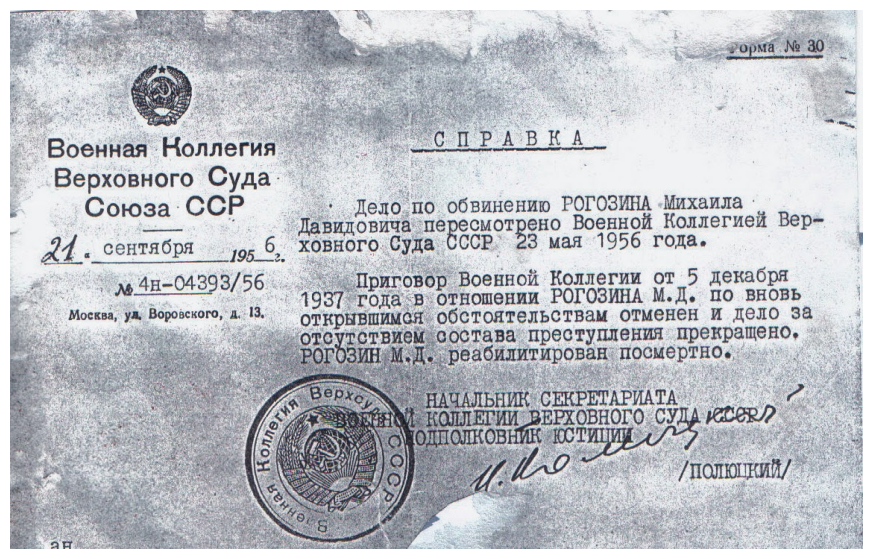

In [2]:
url0 = '../data/raw/example.jpg'
url1 = '../data/raw/example1.jpg'
image0 = mmcv.imread(url0)
image1 = mmcv.imread(url1)

show(image0)

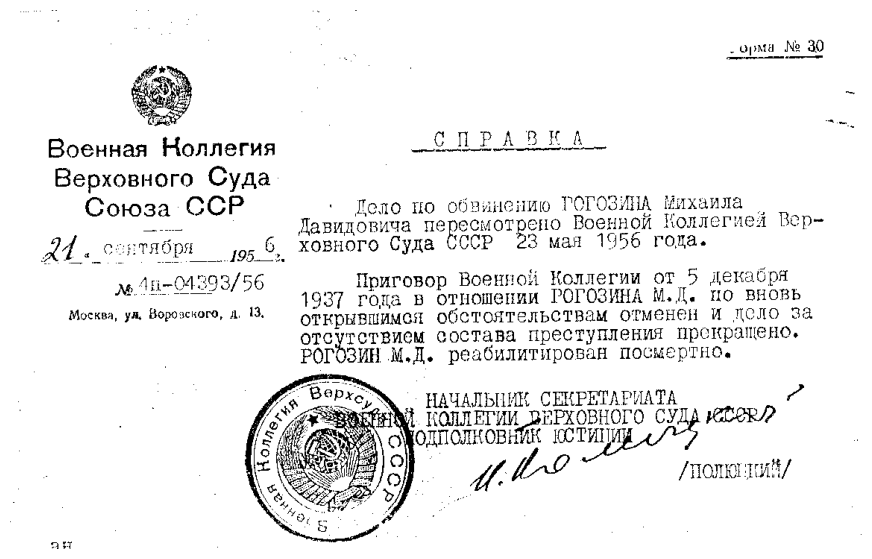

In [3]:
def preprocessing(image):
    image = mmcv.bgr2gray(image)
    image = pp.threshold(image, thresh=90)
    image = mmcv.gray2rgb(image)

    return image

image0 = preprocessing(image0)
image1 = preprocessing(image1)

show(image0)

# USING OCR

In [4]:
from src.models.ocr import OCRModelFactory
from src.visualization.visualize import result2show

In [5]:
mmocr_model = OCRModelFactory.create("mmocr")
# pytesseract_model = OCRModelFactory.create("pytesseract")
# easyocr_model = OCRModelFactory.create("easyocr")

Loads checkpoint by local backend from path: C:\Users\dimka\PycharmProjects\TatneftIT_OCR\src\..\models\ocr\mmocr\dbnet\dbnet_resnet50-oclip.pth
09/22 18:14:00 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.
Loads checkpoint by local backend from path: C:\Users\dimka\PycharmProjects\TatneftIT_OCR\src\..\models\ocr\mmocr\sar\epoch_10.pth


C:\Users\dimka\AppData\Local\Programs\Python\Python39\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [6]:
result = mmocr_model([image0, image1])

Output()

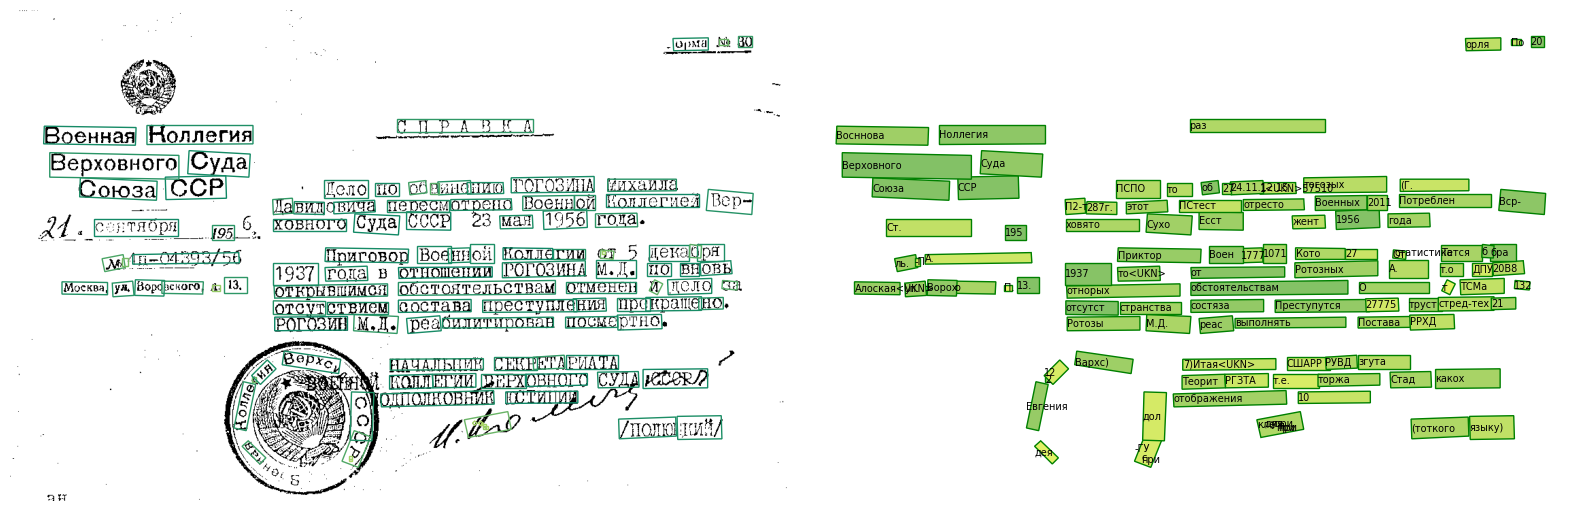

In [9]:
result2show(image=image0, result=result['predictions'][0])

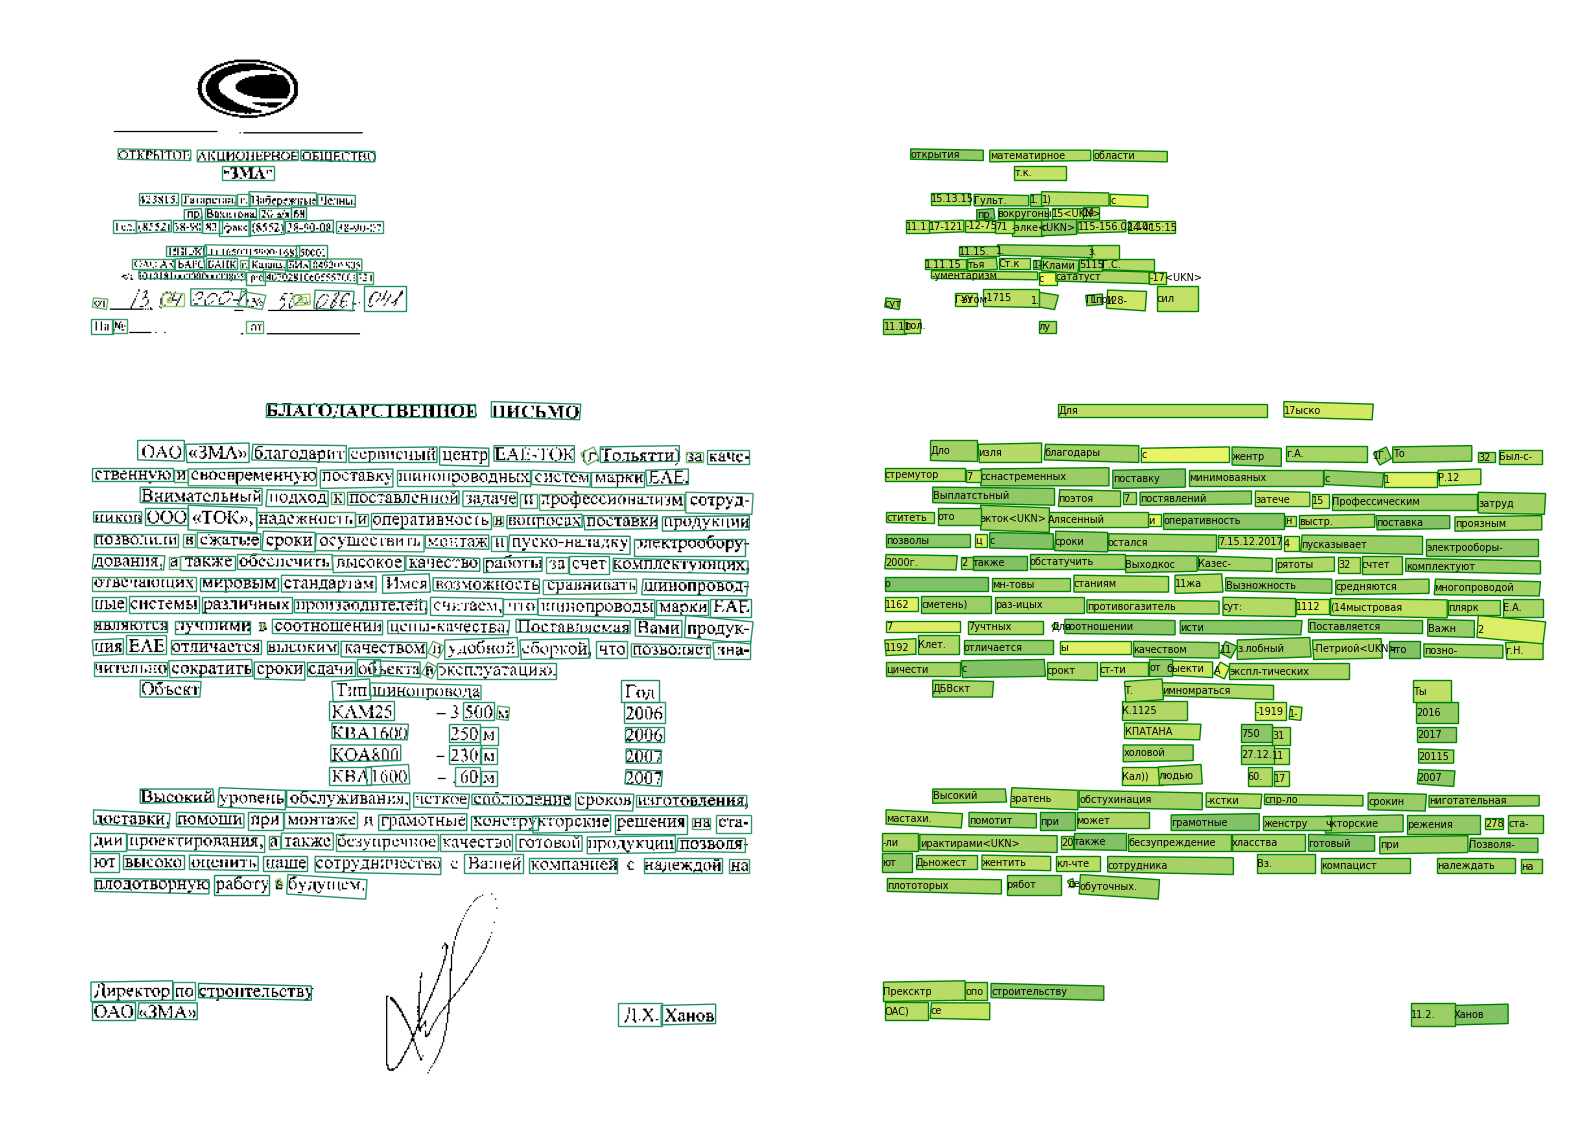

In [10]:
result2show(image=image1, result=result['predictions'][1])